In [150]:
import pandas as pd
import matplotlib.pyplot as plt #for graph

# Condemned Properties

In [151]:
condemned = pd.read_csv("Condemned_Houses.csv", sep = ",")


In [152]:
condemned.head()

,_id,parcel_id,address,owner,property_type,date,latest_inspection_result,latest_inspection_score,inspection_status
0,1286147,0081E00049000000,No primary address specified,SAYER REAL ESTATE LLC,Condemned Property,2021-01-22,Fail,16.0,Inactive
1,1286148,0023C00208000000,"11 LANARK ST, Pittsburgh, PA 15214",CITY OF BRIDGES CLT,Condemned Property,2021-04-07,Fail,26.0,Inactive
2,1286149,0011J00145000000,"211 GIST ST, Pittsburgh, 15219",ECKENRODE ROBERT C,Condemned Property,2022-04-07,Fail,8.0,Inactive
3,1286150,0174L00014000000,No primary address specified,BATTLE RAYNA,Condemned Property,2020-05-19,Fail,15.0,Inactive
4,1286151,0081A00132000000,No primary address specified,MCCOY MARK JOEL & NICOLE HELENA (W),Condemned Property,2020-05-19,Fail,9.0,Inactive


In [153]:
occur = {}
sortedDic= {}

for index, row in condemned.iterrows():
    adress = row["address"]
    status = row["latest_inspection_result"]
    
    if (adress != "No primary address specified") and not pd.isna(adress):
        if status != "Pass" and not pd.isna(status):
            road = adress.split()
            road = road[len(road) - 1]
            if road not in occur:
                occur[road] = 1
            else:
                occur[road] += 1
                
sortedDic = dict(sorted(occur.items(), key=lambda item: item[1], reverse = False))
        
maxCondemned = 0
for hood in sortedDic:
    print(hood ,sortedDic[hood])
    if sortedDic[hood] > maxCondemned:
        maxCondemned = sortedDic[hood]

15232 1
15106 1
15120 2
15227 3
15234 4
15222 6
15235 11
15226 13
15217 19
15205 26
15213 28
15216 29
15211 31
15201 32
15203 48
15221 49
15233 51
15224 56
15220 62
15204 98
15207 134
15214 141
15206 162
15208 195
15219 234
15212 267
15210 387


In [154]:
neighborhoods = {15210  : 'Arlington',
                 15212  : 'Brighton Heights',
                 15219  : 'Crawford-Roberts',
                 15208  : 'Homewood South',
                 15206  : 'East Liberty',
                 15214  : 'Perry North',
                 15207  : 'Glen Hazel',
                 15204  : 'Sheraden',    
                 15220  : 'Green Tree',
                 15224  : 'Bloomfield',
                 15233  : 'Manchester',
                 15221  : 'Wilkinsburg',
                 15203  : 'South Side Flats',
                 15201  : 'Central Lawrenceville',
                 15211  : 'Mount Washington',
                 15216  : 'Mount Lebanon',
                 15213  : 'North Oakland',
                 15205  : 'Crafton',
                 15217  : 'Squirrel Hill South',
                 15226  : 'Brookline',
                 15235  : 'Penn Hills',
                 15222  : 'Central Business District',
                 15234  : 'Castle Shannon',
                 15227  : 'Brentwood',
                 15120  : 'Hays',
                 15106  : 'East Carnegie',
                 15232  : 'Shadyside'
                }

In [155]:
mapped = {}

for hood in sortedDic:
    for zipCode in neighborhoods:
        if str(zipCode) == str(hood):
            mapped[neighborhoods.get(zipCode)] = sortedDic.get(hood)        
    
for amt in mapped:
    mapped[str(amt)] = (mapped[str(amt)] / maxCondemned * 10 )
    print(amt, mapped[amt])

Shadyside 0.02583979328165375
East Carnegie 0.02583979328165375
Hays 0.0516795865633075
Brentwood 0.07751937984496124
Castle Shannon 0.103359173126615
Central Business District 0.15503875968992248
Penn Hills 0.2842377260981912
Brookline 0.3359173126614987
Squirrel Hill South 0.4909560723514212
Crafton 0.6718346253229974
North Oakland 0.7235142118863048
Mount Lebanon 0.7493540051679587
Mount Washington 0.8010335917312661
Central Lawrenceville 0.82687338501292
South Side Flats 1.2403100775193798
Wilkinsburg 1.2661498708010335
Manchester 1.3178294573643412
Bloomfield 1.4470284237726097
Green Tree 1.6020671834625322
Sheraden 2.532299741602067
Glen Hazel 3.4625322997416017
Perry North 3.643410852713178
East Liberty 4.186046511627907
Homewood South 5.038759689922481
Crawford-Roberts 6.046511627906977
Brighton Heights 6.89922480620155
Arlington 10.0


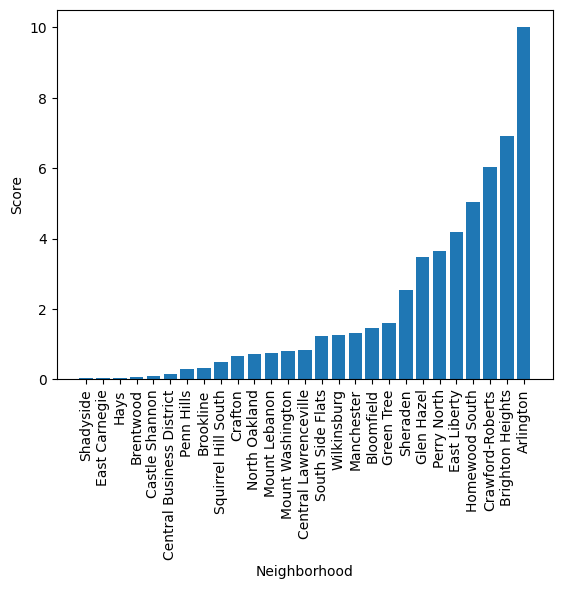

In [156]:
plt.bar(range(len(mapped)), list(mapped.values()), align='center')
plt.xticks(range(len(mapped)), list(mapped.keys()), rotation =90)
plt.xlabel("Neighborhood")
plt.ylabel("Score")
plt.show()

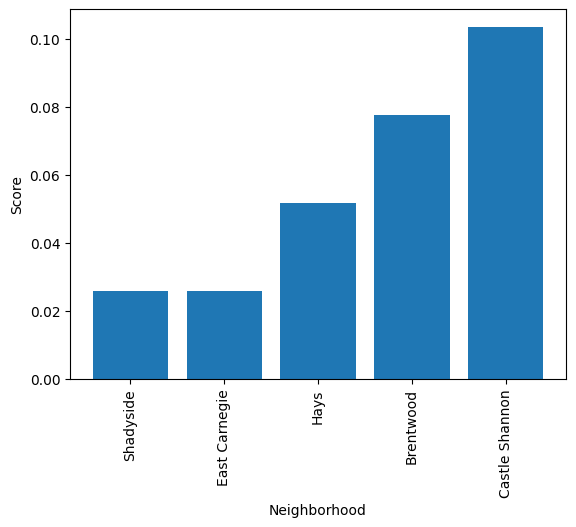

In [157]:
graph = {}

counter = 0 # only add top 5 winners
for atm in mapped:
    graph[atm] = mapped.get(atm)
    counter += 1
    if counter >= 5:
        break



plt.bar(range(len(graph)), list(graph.values()), align='center')
plt.xticks(range(len(graph)), list(graph.keys()), rotation =90)
plt.xlabel("Neighborhood")
plt.ylabel("Score")
plt.show()

# Ballfields

In [158]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [159]:
ballfields = pd.read_csv("ballfieldsData.csv") #reading the dataset
ballfields

,_id,field_name,x,y,objectid,area,perimeter,ballfields,ballfiel_1,id,polygonid,scale,angle,point_x,point_y,dpw_name,cityid,active
0,3301,McBride Park,-79.907773,40.368990,1,0.0,0.0,1.0,1.0,72,0.0,0.0,0.0,1.367323e+06,384617.783181,Mcbride,P345,Yes
1,3302,Carmalt School,-80.006456,40.386580,2,0.0,0.0,2.0,2.0,27,0.0,0.0,0.0,1.339998e+06,391710.738812,Carmalt,P299,Yes
2,3303,Sam Bryan 2,-80.006881,40.389443,3,0.0,0.0,3.0,3.0,24,0.0,0.0,0.0,1.339906e+06,392756.625499,Sam Bryen #2,P394,Yes
3,3304,Sam Bryan 1,-80.007051,40.389711,4,0.0,0.0,4.0,4.0,23,0.0,0.0,0.0,1.339862e+06,392855.383504,Sam Bryen #1,P296,Yes
4,3305,Brookline T-Ball,-80.007183,40.390456,5,0.0,0.0,5.0,5.0,22,0.0,0.0,0.0,1.339832e+06,393127.716293,Officer Stephen J. Mayhle Memorial Park,P295,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3426,Brighton Heights 1,-80.033498,40.488679,126,0.0,0.0,126.0,126.0,15,0.0,0.0,0.0,1.333429e+06,429086.777248,#1 Brighton Hights,P288,Yes
126,3427,Volunteers 4,-79.994325,40.397489,127,NaN,NaN,NaN,NaN,113,NaN,NaN,NaN,NaN,NaN,Volunteers #4,NaN,Yes
127,3428,Volunteers 3,-79.992973,40.398191,128,NaN,NaN,NaN,NaN,112,NaN,NaN,NaN,NaN,NaN,Volunteers #3,NaN,Yes
128,3429,Schenley 2,-79.942339,40.433466,129,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,Schenley # 2,P369,Yes


In [160]:
ballfieldsNb = pd.read_csv("ballfieldsData-Copy1.csv") #reads the file name and assigns it to variable ballfieldsNb

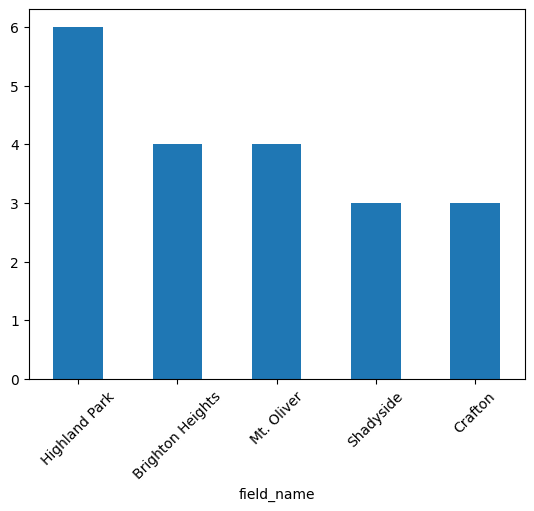

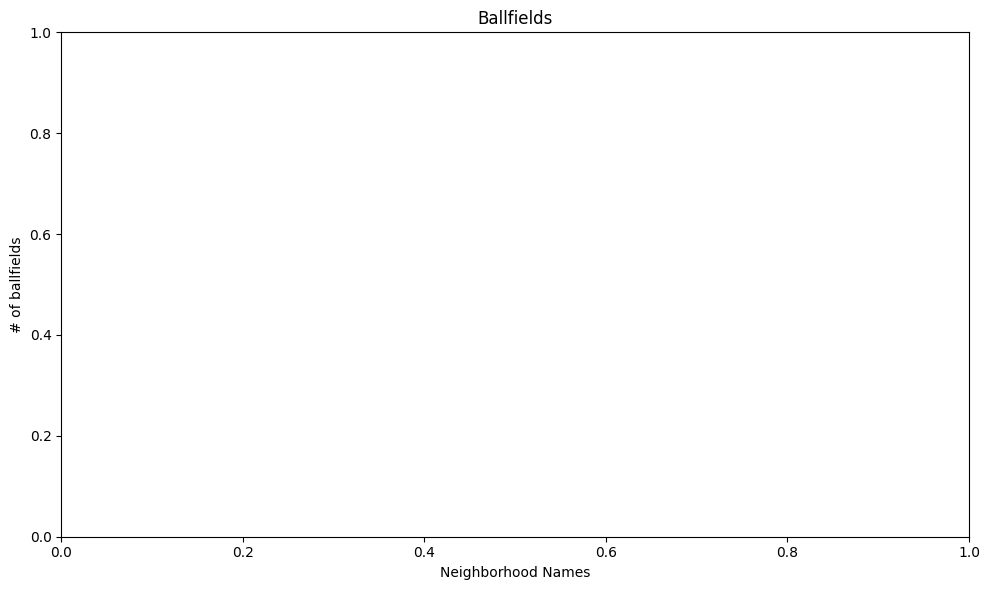

In [161]:
value_countsNb = ballfieldsNb["field_name"].value_counts() #assigns counting the field name values to variable value_countsNb
filtered_countsNb = value_countsNb[value_countsNb > 2] #plots only neighborhoods with 3 or more ballfields
filtered_countsNb.plot(kind='bar') #creating a bar graph
plt.xticks(rotation=45) #rotating the names on the x axis to a 45 degree angle to prevent overlap
plt.figure(figsize=(10, 6))  #creating graph size to fit names
plt.xlabel('Neighborhood Names') #labeling the x axis as Neighborhood Names
plt.ylabel('# of ballfields') #labeling the y axis as # of ballfields
plt.title('Ballfields') #titling the graph as Ballfields
plt.tight_layout() #adjusts the size of the graph to fit the 10,6 parameters


In [162]:

neighborhoods = ['Highland Park', 'Brighton Heights', 'Mt. Oliver', 'Shadyside', 'Crafton']

ten_scores = [10, 7, 7, 5, 5]
neighborhood_to_score = {neighborhood: score for neighborhood, score in zip(neighborhoods, ten_scores)}

ballfieldsNb = pd.DataFrame({
    'field_name': ['Highland Park', 'Brighton Heights', 'Mt. Oliver', 'Shadyside', 'Crafton']
})

ballfieldsNb['score'] = ballfieldsNb['field_name'].map(neighborhood_to_score)


print(ballfieldsNb[['field_name', 'score']].rename(columns={'field_name': 'Neighborhood'}))

       Neighborhood  score
0     Highland Park     10
1  Brighton Heights      7
2        Mt. Oliver      7
3         Shadyside      5
4           Crafton      5


In [163]:
ballfieldsNb = pd.read_csv("ballfieldsData-Copy1.csv")
value_countsNb = ballfieldsNb["field_name"].value_counts() 
filtered_countsNb = value_countsNb[value_countsNb > 2]

neighborhood_counts_df = pd.DataFrame(filtered_countsNb)
neighborhood_counts_df.reset_index(inplace=True)
neighborhood_counts_df.columns = ['Neighborhood', 'Count']

neighborhood_counts_dict = dict(zip(neighborhood_counts_df['Neighborhood'], neighborhood_counts_df['Count']))


print(neighborhood_counts_dict)

{'Highland Park': 6, 'Brighton Heights': 4, 'Mt. Oliver': 4, 'Shadyside': 3, 'Crafton': 3}


elija put code here

{'Highland Park': 6, 'Brighton Heights': 4, 'Mt. Oliver': 4, 'Shadyside': 3, 'Crafton': 3}
{'Highland Park': 6, 'Brighton Heights': 0, 'Mt. Oliver': 4, 'Shadyside': 2.9741602067183464, 'Crafton': 2.3281653746770026}


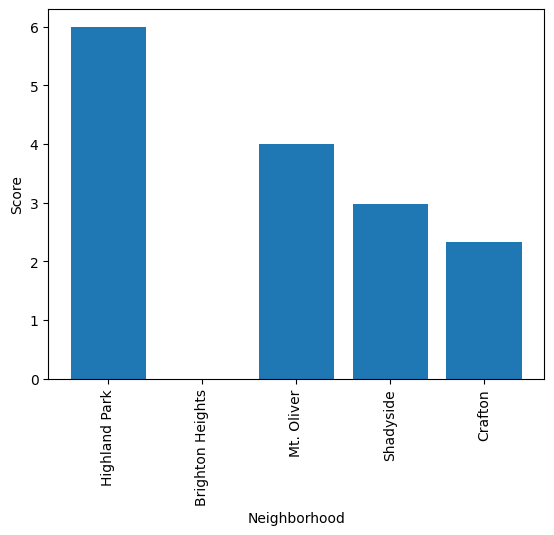

In [164]:
best = {}


for hood in neighborhood_counts_dict: #adding jacobs scores to best
    best[hood] = neighborhood_counts_dict[hood]



#elija- replace "elijaDict" with your dictionary with your places and scores. Then uncomment code below

#for place in elijaDict: #adding elijas scores to best
#    if place not in best: # if place is not in best, add it. else get avg of existing score and new score
#        best[place] = elijaDict[place]
#    else:
#        best[place] = (best[place] + elijaDict[place])/2 



print(best)

for place in best: #subtracting nathaniels scores from best
    for hood in mapped:
        if place == hood:
            best[place] = best[place] - mapped[hood]
            if best[place] < 0: #make lowest score 0 (not negative)
                best[place] = 0

print(best)        

#
plt.bar(range(len(best)), list(best.values()), align='center')
plt.xticks(range(len(best)), list(best.keys()), rotation =90)
plt.xlabel("Neighborhood")
plt.ylabel("Score")
plt.show()
